In [ ]:
# prompt: write code to use colab gpu

# Check if a GPU is available
!nvidia-smi

# Enable GPU usage for the current runtime
!nvidia-smi -L

# Set the environment variable for the GPU device
%env CUDA_DEVICE_ORDER=PCI_BUS_ID

# Set the environment variable for the specific GPU to use
%env CUDA_VISIBLE_DEVICES=0

# Verify that the GPU is being used
!nvidia-smi


Tue Jul 23 08:53:58 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import pandas as pd
import regex as re
import nltk as nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer as countVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df = pd.read_csv('/content/stock_data.csv')

In [ ]:
df.head()

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


In [ ]:
print(df['Sentiment'].value_counts())

Sentiment
 1    3685
-1    2106
Name: count, dtype: int64


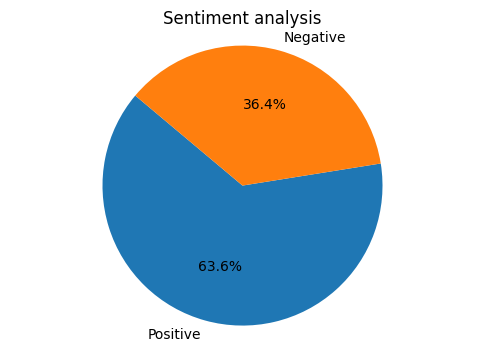

In [ ]:
import matplotlib.pyplot as plt
# Let's visualize the distribution of sentiment (test for normality) using a pie chart.
plt.figure(figsize=(6, 4))
plt.pie(df['Sentiment'].value_counts(), labels=['Positive', 'Negative'], autopct='%1.1f%%',
        radius=1, startangle=140)
plt.title('Sentiment analysis')  # Chart title
plt.axis('equal')  # Equal ensures that the circle is drawn as a circle.
plt.show()  # Show Pie Chart

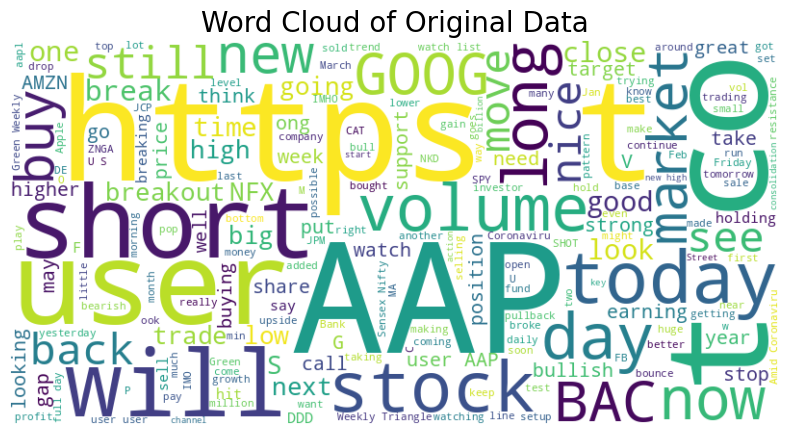

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert the original and clean corpus into single strings of text
original_text = ' '.join(df['Text'].tolist())
# Function to generate and display a word cloud
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

# Generate and display word cloud for original text
generate_word_cloud(original_text, 'Word Cloud of Original Data')



In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Split the clean corpus into positive and negative texts
positive_df = df[df['Sentiment']==1]
positive_texts = positive_df['Text'].tolist()
negative_df = df[df['Sentiment']==-1]
negative_texts = negative_df['Text'].tolist()

# Convert the positive and negative texts into single strings of text
positive_text = ' '.join(positive_texts)
negative_text = ' '.join(negative_texts)

# Generate and display word cloud for positive text
generate_word_cloud(positive_text, 'Positive Sentiment Word Cloud')
print("\n")
generate_word_cloud(negative_text, 'Negative Sentiment Word Cloud')


# Data Preprocessing


In [ ]:
df.shape

(5791, 2)

In [ ]:
ps = PorterStemmer()

In [ ]:
def preprocessData(raw_corpus):
  #remove email
  raw_text = re.sub('\b[\w\-.]+?@\w+?\.\w{2,4}\b'," ",raw_corpus)
  # #remove url
  raw_text = re.sub(r'(http[s]?://\S+)|(\w+\.[A-Za-z]{2,4}\S*)', " ", raw_text)
  # Remove non-letters except numbers
  raw_text = re.sub(r'[^a-zA-Z0-9]', " ", raw_text)

  #stopwords removal:
  stop_words = set(stopwords.words('english'))
  split_words = raw_text.lower().split()
  clean_text = [ps.stem(w) for w in split_words if not w in stop_words]
  # Join the cleaned words
  return (" ".join(clean_text))



In [ ]:
df2 = df

In [ ]:
clean_corpus = []
text_count = df['Text'].size
for i in range(0,text_count):
  clean_corpus.append(preprocessData(df['Text'][i]))

df2['Text'] = df['Text'].apply(preprocessData)

In [ ]:
df['Text'][0]

'kicker watchlist xide tit soq pnk cpw bpz aj trade method 1 method 2 see prev post'

In [ ]:
df2['Text'][0]

'kicker watchlist xide tit soq pnk cpw bpz aj trade method 1 method 2 see prev post'

In [ ]:
clean_corpus[0]

'kicker watchlist xide tit soq pnk cpw bpz aj trade method 1 method 2 see prev post'

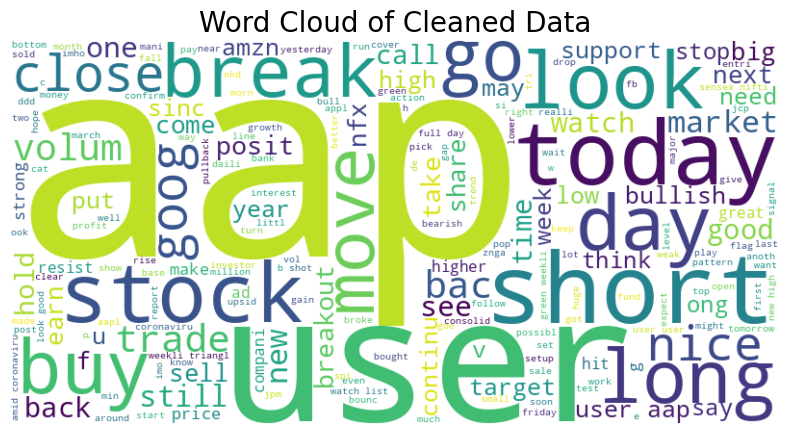

In [ ]:
# Generate and display word cloud for cleaned text
clean_text = ' '.join(clean_corpus)
generate_word_cloud(clean_text, 'Word Cloud of Cleaned Data')


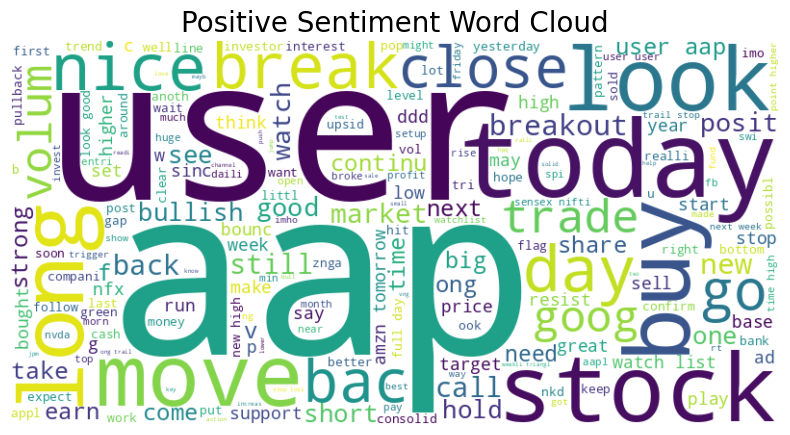

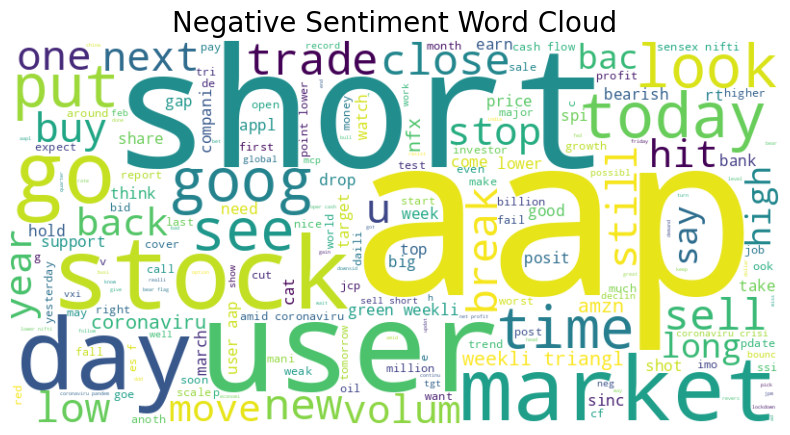

In [ ]:

# Split the clean corpus into positive and negative texts
positive_df2 = df2[df2['Sentiment']==1]
positive_texts2 = positive_df2['Text'].tolist()
negative_df2 = df2[df2['Sentiment']==-1]
negative_texts2 = negative_df2['Text'].tolist()

positive_text = ' '.join(positive_texts2)
negative_text = ' '.join(negative_texts2)

generate_word_cloud(positive_text, 'Positive Sentiment Word Cloud')
print("\n")
generate_word_cloud(negative_text, 'Negative Sentiment Word Cloud')


# Converting text into vectors| Applying Feature Extraction Techniques

# BAG OF words

In [ ]:
cv = countVectorizer()
Bag_of_words = cv.fit_transform(clean_corpus).toarray()

In [ ]:
Bag_of_words[0]

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# pip install wordcloud matplotlib


# TF-IDF

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(clean_corpus).toarray()


In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2))  # Using unigrams and bigrams
tfidf_ngrams = vectorizer.fit_transform(clean_corpus).toarray()

# Word2Vec

In [ ]:
tokenized_corpus = [sentence.split() for sentence in clean_corpus]

# Train the Word2Vec model
model = Word2Vec(tokenized_corpus, vector_size=100, window=5, min_count=1, workers=4)

def get_avg_word_vector(sentence, model):
    word_vectors = [model.wv[word] for word in sentence if word in model.wv.key_to_index]
    if len(word_vectors) == 0:
        return np.zeros(model.vector_size)  # Handle case with no words in the model
    return np.mean(word_vectors, axis=0)

# Create the feature matrix for the SVM
Word2vect = np.array([get_avg_word_vector(sentence, model) for sentence in tokenized_corpus])

## Model Evaluation Function

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, classification_report
def model_evaluation(y_test,y_pred, X_test,accuracy,model):
  conf_matrix = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(8, 6))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix')
  plt.show()

  print('\n')

  y_prob = model.predict_proba(X_test)[:, 1]  # Get the probabilities of the positive class
  fpr, tpr, thresholds = roc_curve(y_test, y_prob)
  roc_auc = roc_auc_score(y_test, y_prob)

  plt.figure(figsize=(8, 6))
  plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc="lower right")
  plt.show()

  print('\n')
    # Classification Report and Accuracy
  accuracy = accuracy_score(y_test, y_pred)
  report = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])

  print(f"Accuracy: {accuracy:.2f}")
  print("Classification Report:")
  print(report)


## Preparation for Model Training

In [ ]:
#storing labels in labels list
labels = df['Sentiment']

In [ ]:
#check the positive and negative values count
labels.value_counts()

Sentiment
 1    3685
-1    2106
Name: count, dtype: int64

## SVM with tfidf


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tfidf, labels, test_size=0.2, random_state=42)
svm_model = SVC(kernel='linear', C=1, random_state=42,probability=True)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8050043140638481
Classification Report:
               precision    recall  f1-score   support

          -1       0.78      0.66      0.71       427
           1       0.82      0.89      0.85       732

    accuracy                           0.81      1159
   macro avg       0.80      0.77      0.78      1159
weighted avg       0.80      0.81      0.80      1159



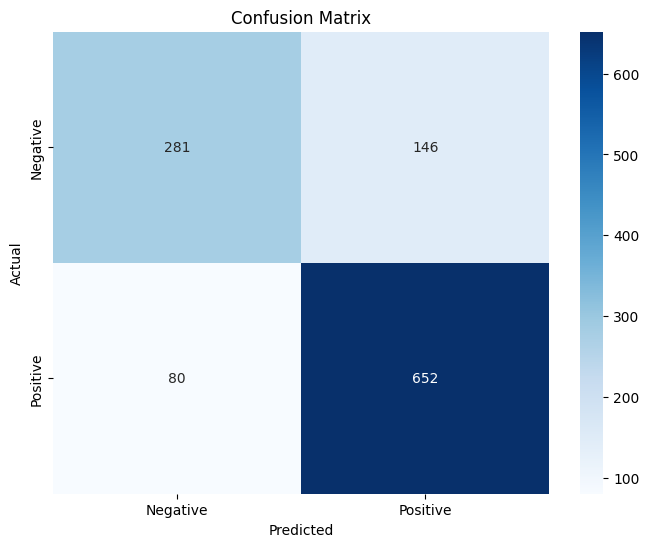

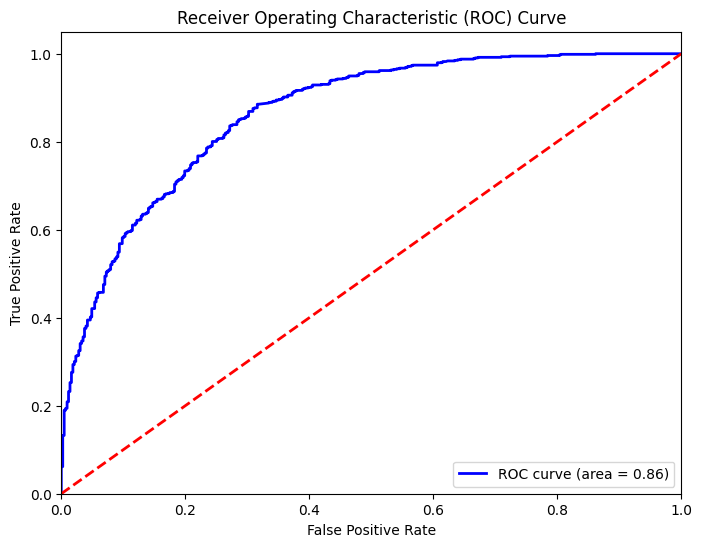



Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

    Negative       0.78      0.66      0.71       427
    Positive       0.82      0.89      0.85       732

    accuracy                           0.81      1159
   macro avg       0.80      0.77      0.78      1159
weighted avg       0.80      0.81      0.80      1159



In [ ]:
model_evaluation(y_test,y_pred, X_test,accuracy_score,svm_model)

## SVM with bag_of_words

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Bag_of_words, labels, test_size=0.2, random_state=42)
svm_model = SVC(kernel='linear', C=1, random_state=42,probability=True)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7817083692838654
Classification Report:
               precision    recall  f1-score   support

          -1       0.71      0.70      0.70       427
           1       0.83      0.83      0.83       732

    accuracy                           0.78      1159
   macro avg       0.77      0.76      0.77      1159
weighted avg       0.78      0.78      0.78      1159



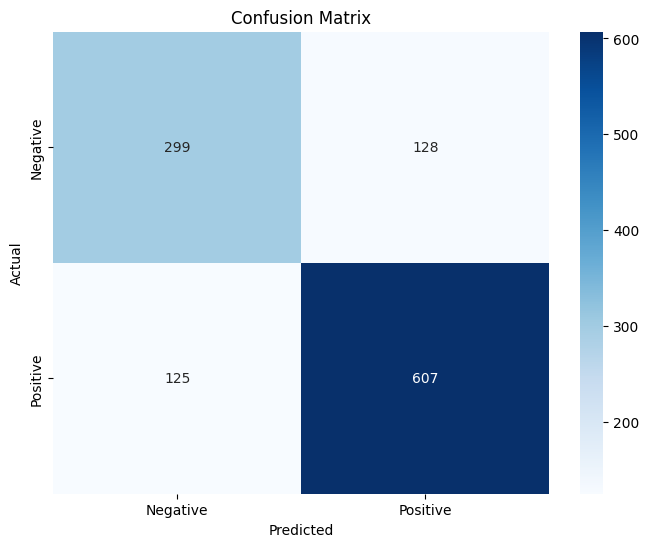

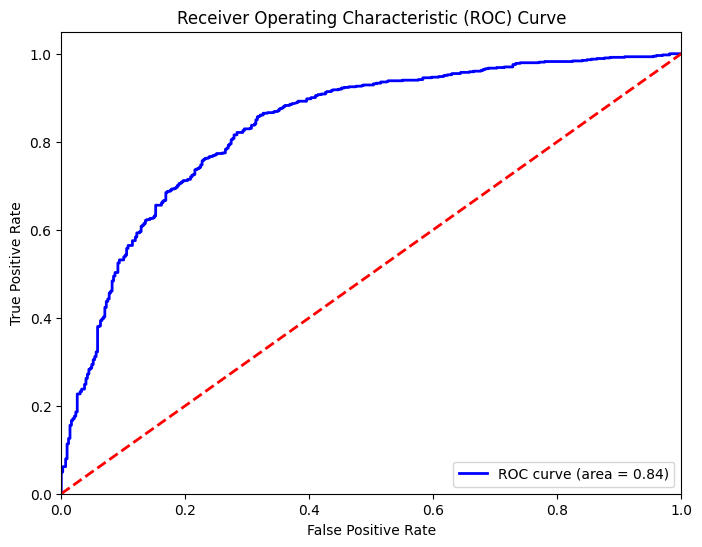



Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

    Negative       0.71      0.70      0.70       427
    Positive       0.83      0.83      0.83       732

    accuracy                           0.78      1159
   macro avg       0.77      0.76      0.77      1159
weighted avg       0.78      0.78      0.78      1159



In [ ]:
model_evaluation(y_test,y_pred, X_test,accuracy_score,svm_model)

## SVM with word2vec

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Word2vect, labels, test_size=0.2, random_state=42)
svm_model = SVC(kernel='linear', C=1, random_state=42,probability=True)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))

Accuracy: 0.631578947368421
Classification Report:
               precision    recall  f1-score   support

          -1       1.00      0.00      0.00       427
           1       0.63      1.00      0.77       732

    accuracy                           0.63      1159
   macro avg       0.82      0.50      0.39      1159
weighted avg       0.77      0.63      0.49      1159



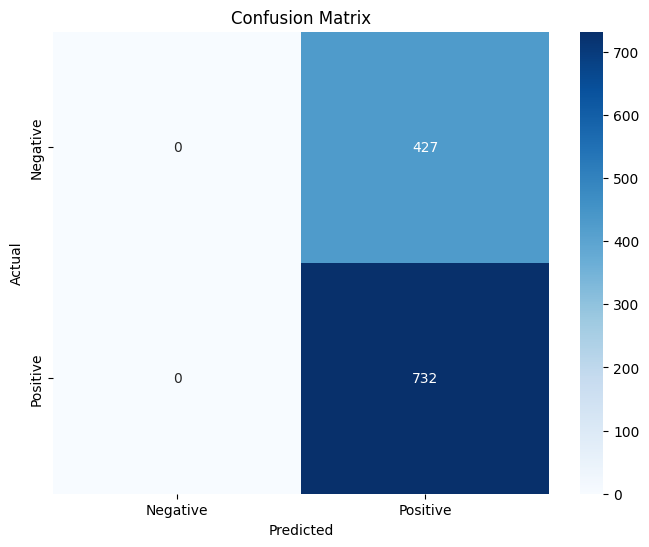

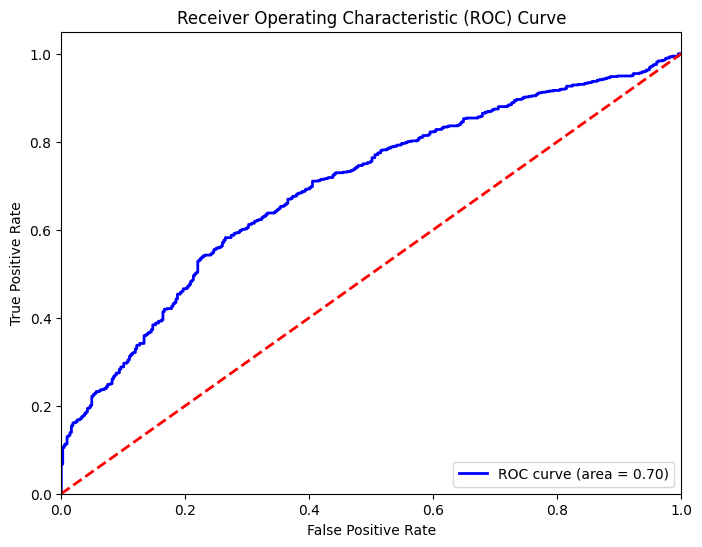



Accuracy: 0.63
Classification Report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       427
    Positive       0.63      1.00      0.77       732

    accuracy                           0.63      1159
   macro avg       0.32      0.50      0.39      1159
weighted avg       0.40      0.63      0.49      1159



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model_evaluation(y_test,y_pred, X_test,accuracy_score,svm_model)

## Logistic regression with Tf-idf

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tfidf, labels, test_size=0.2, random_state=42)


# Create a logistic regression classifier
log_reg_model = LogisticRegression(random_state=42)

# Train the model
log_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7886108714408974
Classification Report:
               precision    recall  f1-score   support

          -1       0.82      0.55      0.66       427
           1       0.78      0.93      0.85       732

    accuracy                           0.79      1159
   macro avg       0.80      0.74      0.75      1159
weighted avg       0.79      0.79      0.78      1159



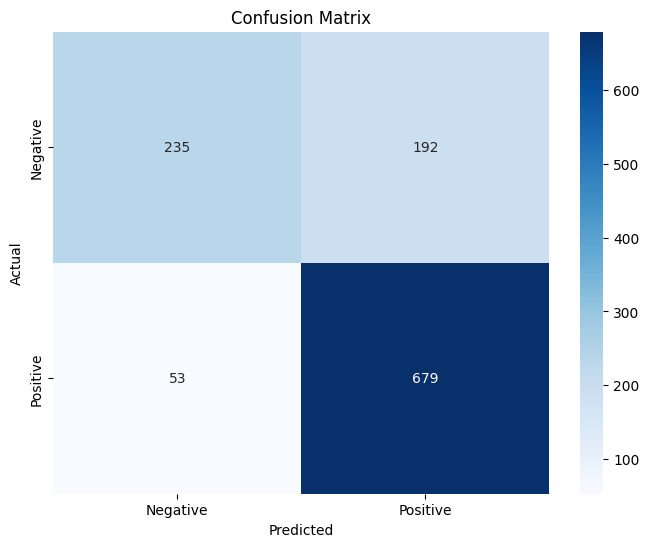

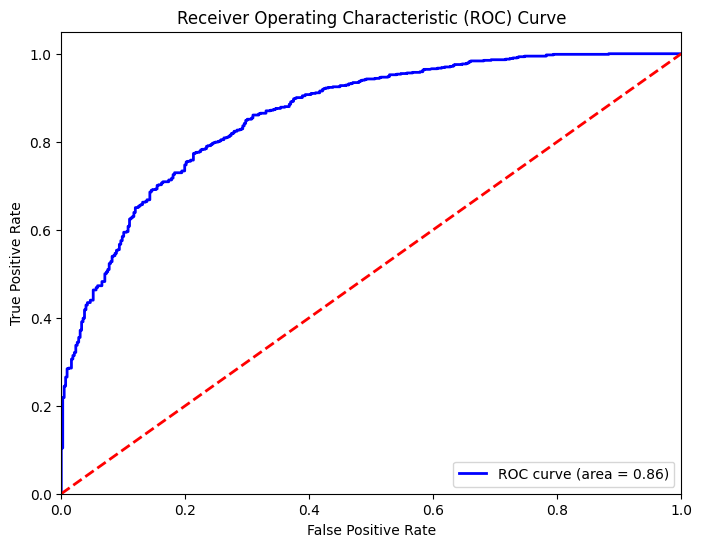



Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

    Negative       0.82      0.55      0.66       427
    Positive       0.78      0.93      0.85       732

    accuracy                           0.79      1159
   macro avg       0.80      0.74      0.75      1159
weighted avg       0.79      0.79      0.78      1159



In [ ]:
model_evaluation(y_test,y_pred, X_test,accuracy_score,log_reg_model)

## Logistic regression with Bag Of words

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Bag_of_words, labels, test_size=0.2, random_state=42)


# Create a logistic regression classifier
log_reg_model = LogisticRegression(random_state=42)

# Train the model
log_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7955133735979293
Classification Report:
               precision    recall  f1-score   support

          -1       0.75      0.67      0.71       427
           1       0.82      0.87      0.84       732

    accuracy                           0.80      1159
   macro avg       0.78      0.77      0.77      1159
weighted avg       0.79      0.80      0.79      1159



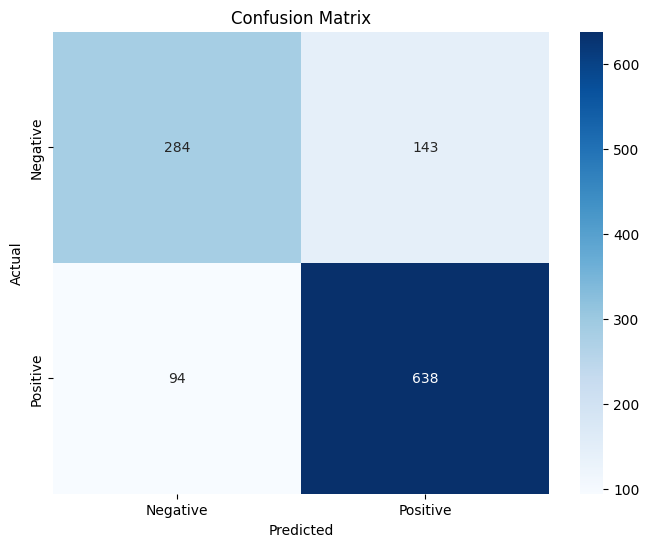

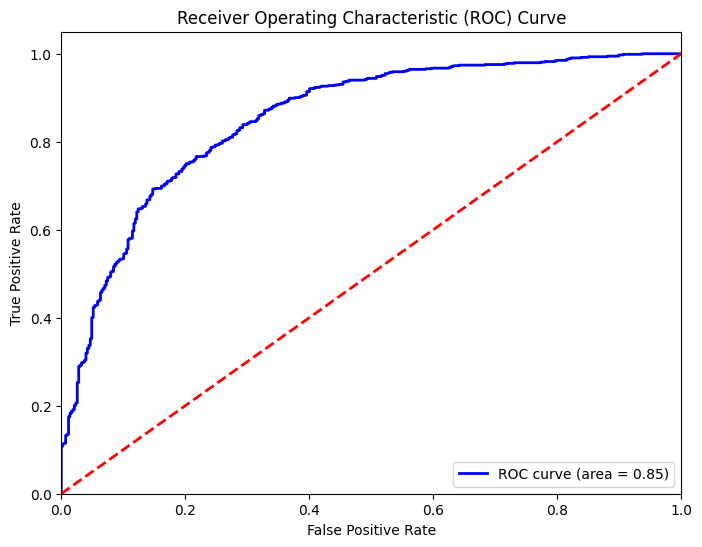



Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

    Negative       0.75      0.67      0.71       427
    Positive       0.82      0.87      0.84       732

    accuracy                           0.80      1159
   macro avg       0.78      0.77      0.77      1159
weighted avg       0.79      0.80      0.79      1159



In [ ]:
model_evaluation(y_test,y_pred, X_test,accuracy_score,log_reg_model)

## Logistic regression with Word2Vec

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Word2vect, labels, test_size=0.2, random_state=42)


# Create a logistic regression classifier
log_reg_model = LogisticRegression(random_state=42)

# Train the model
log_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.635030198446937
Classification Report:
               precision    recall  f1-score   support

          -1       0.75      0.01      0.03       427
           1       0.63      1.00      0.78       732

    accuracy                           0.64      1159
   macro avg       0.69      0.51      0.40      1159
weighted avg       0.68      0.64      0.50      1159



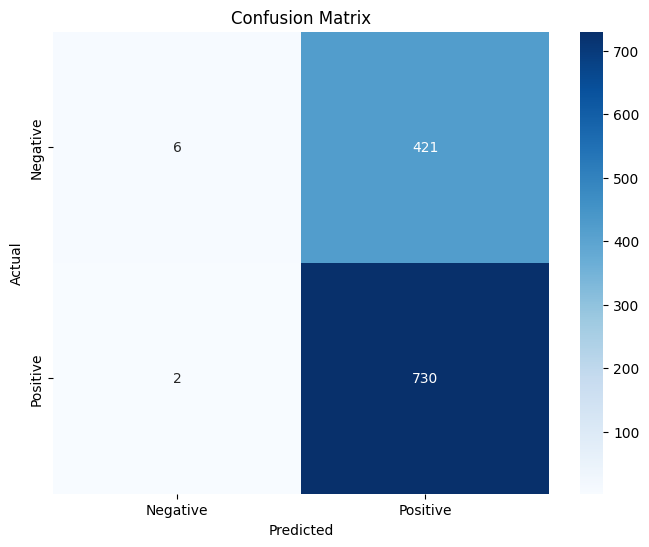

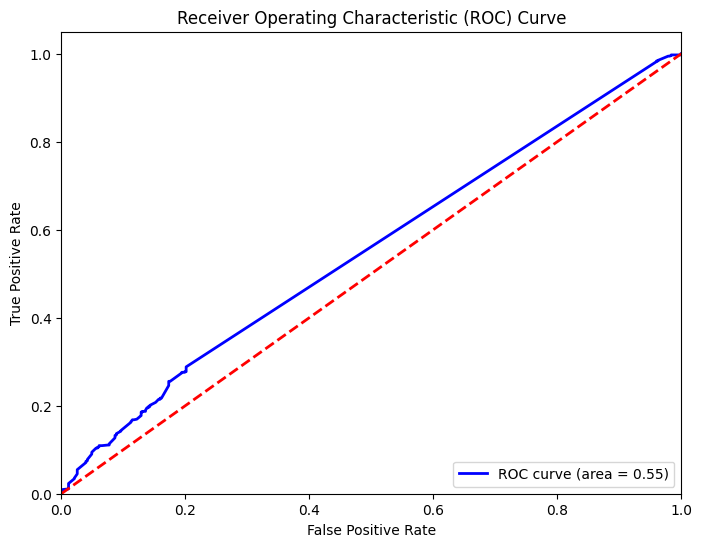



Accuracy: 0.64
Classification Report:
              precision    recall  f1-score   support

    Negative       0.75      0.01      0.03       427
    Positive       0.63      1.00      0.78       732

    accuracy                           0.64      1159
   macro avg       0.69      0.51      0.40      1159
weighted avg       0.68      0.64      0.50      1159



In [ ]:
model_evaluation(y_test,y_pred, X_test,accuracy_score,log_reg_model)

## RandomForest with Tf-idf

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(tfidf, labels, test_size=0.2, random_state=42)
# Create a RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
RF_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = RF_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7834339948231234
Classification Report:
               precision    recall  f1-score   support

          -1       0.77      0.59      0.67       427
           1       0.79      0.89      0.84       732

    accuracy                           0.78      1159
   macro avg       0.78      0.74      0.75      1159
weighted avg       0.78      0.78      0.78      1159



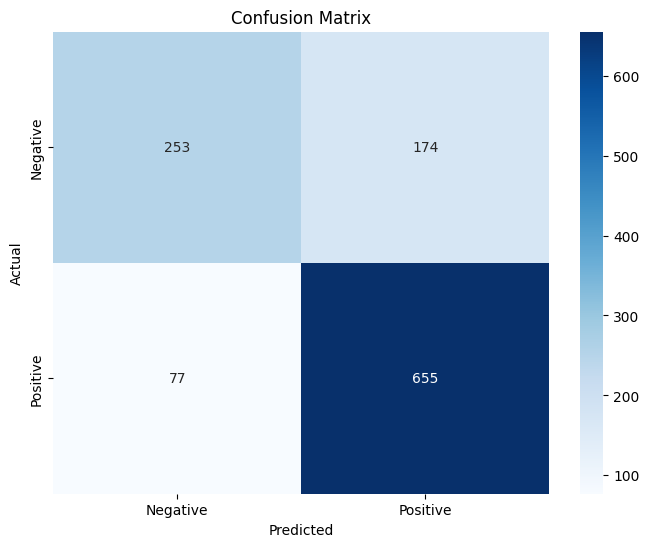

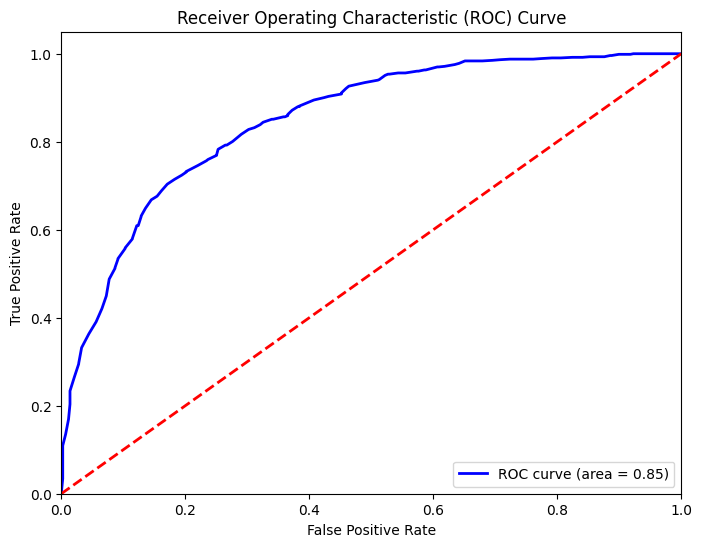



Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

    Negative       0.77      0.59      0.67       427
    Positive       0.79      0.89      0.84       732

    accuracy                           0.78      1159
   macro avg       0.78      0.74      0.75      1159
weighted avg       0.78      0.78      0.78      1159



In [ ]:
model_evaluation(y_test,y_pred, X_test,accuracy_score,RF_model)

## RandomForest with Bag Of words

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Bag_of_words, labels, test_size=0.2, random_state=42)
# Create a RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
RF_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = RF_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7868852459016393
Classification Report:
               precision    recall  f1-score   support

          -1       0.74      0.64      0.69       427
           1       0.81      0.87      0.84       732

    accuracy                           0.79      1159
   macro avg       0.78      0.76      0.76      1159
weighted avg       0.78      0.79      0.78      1159



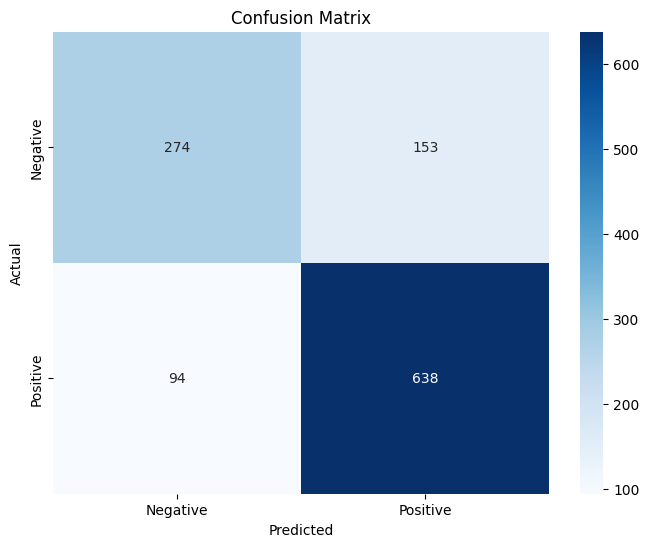

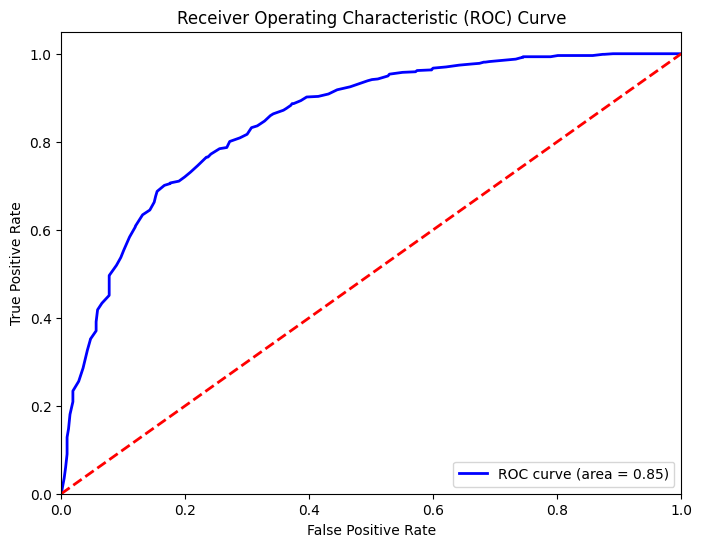



Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

    Negative       0.74      0.64      0.69       427
    Positive       0.81      0.87      0.84       732

    accuracy                           0.79      1159
   macro avg       0.78      0.76      0.76      1159
weighted avg       0.78      0.79      0.78      1159



In [ ]:

model_evaluation(y_test,y_pred, X_test,accuracy_score,RF_model)

## RandomForest with Word2vec

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Word2vect, labels, test_size=0.2, random_state=42)
# Create a RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
RF_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = RF_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6272648835202761
Classification Report:
               precision    recall  f1-score   support

          -1       0.41      0.03      0.05       427
           1       0.63      0.98      0.77       732

    accuracy                           0.63      1159
   macro avg       0.52      0.50      0.41      1159
weighted avg       0.55      0.63      0.50      1159



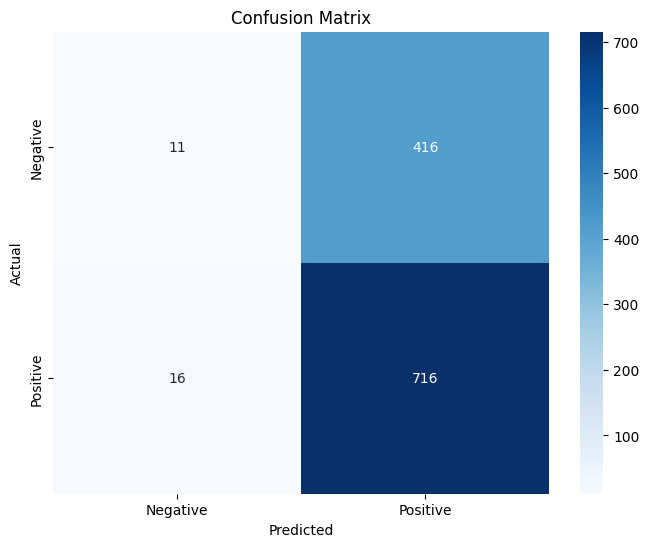

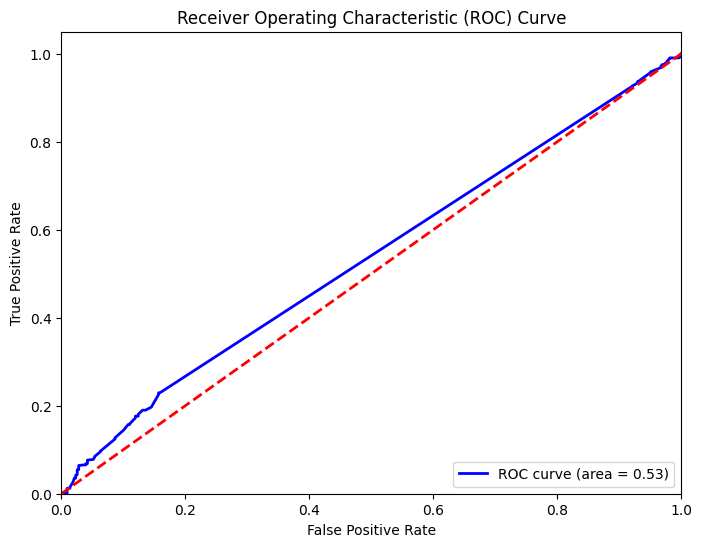



Accuracy: 0.63
Classification Report:
              precision    recall  f1-score   support

    Negative       0.41      0.03      0.05       427
    Positive       0.63      0.98      0.77       732

    accuracy                           0.63      1159
   macro avg       0.52      0.50      0.41      1159
weighted avg       0.55      0.63      0.50      1159



In [ ]:
model_evaluation(y_test,y_pred, X_test,accuracy_score,RF_model)

RNN


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding,Dropout
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.regularizers import l2

In [ ]:
def count_words(text):
    return len(text.split())

# Apply the function to each row in the 'Text' column and sum the results
total_words = df2['Text'].apply(count_words).sum()
total_words

56793

# Data Augmentation

> Add blockquote



In [ ]:
pip install nltk


In [ ]:
import random
import nltk
from nltk.corpus import wordnet

nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
def synonym_replacement(sentence, n):
    words = sentence.split()
    new_words = words.copy()
    random_word_list = list(set([word for word in words if word not in stop_words]))
    random.shuffle(random_word_list)
    num_replaced = 0
    for random_word in random_word_list:
        synonyms = get_synonyms(random_word)
        if len(synonyms) >= 1:
            synonym = random.choice(synonyms)
            new_words = [synonym if word == random_word else word for word in new_words]
            num_replaced += 1
        if num_replaced >= n:  # Only replace up to n words
            break

    sentence = ' '.join(new_words)
    return sentence

def get_synonyms(word):
    synonyms = []
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonym = lemma.name().replace("_", " ").replace("-", " ").lower()
            synonyms.append(synonym)
    return list(set(synonyms))


In [ ]:
stop_words = set(nltk.corpus.stopwords.words('english'))

def augment_data(X_train, y_train, augmentation_factor=2):
    augmented_X_train = []
    augmented_y_train = []

    for x, y in zip(X_train, y_train):
        augmented_X_train.append(x)
        augmented_y_train.append(y)
        for _ in range(augmentation_factor):
            augmented_sentence = synonym_replacement(x, n=1)
            augmented_X_train.append(augmented_sentence)
            augmented_y_train.append(y)

    return augmented_X_train, augmented_y_train

# Example usage
augmented_text, augmented_labels = augment_data(df2['Text'], df2['Sentiment'])

print(f"Original size: {len(df2['Text'])}")
print(f"Augmented size: {len(augmented_text)}")


Original size: 5791
Augmented size: 17373


In [ ]:
# Tokenize the text
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(augmented_text)

# Convert text to sequences
X_augmented = tokenizer.texts_to_sequences(augmented_text)
y_augmented = np.array(augmented_labels)

In [ ]:
# Pad sequences to ensure uniform input size
X_augmented = pad_sequences(X_augmented, maxlen=30)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_augmented,y_augmented, test_size = 0.33, random_state = 42)

In [ ]:
max_features = 20000  # Number of words to consider as features
max_len = 500         # Cut texts after this number of words (among the top max_features most common words)
batch_size = 32
# tokenizer = Tokenizer(num_words=max_features, split=' ')
# tokenizer.fit_on_texts(df2['Text'].values)
# X = tokenizer.texts_to_sequences(df2['Text'].values)
# X = pad_sequences(X)

In [ ]:
print('X_train: ',X_train.shape)
print('Y_train: ', Y_train.shape)
print('X_test: ',X_test.shape)
print('Y_test: ', Y_test.shape)

X_train:  (11639, 30)
Y_train:  (11639,)
X_test:  (5734, 30)
Y_test:  (5734,)


In [ ]:
model = Sequential()
model.add(Embedding(10000, 128))
model.add(SimpleRNN(64, return_sequences=True))
model.add(SimpleRNN(64))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(1, activation="sigmoid"))

model.summary()
model.compile("rmsprop", "binary_crossentropy",
              metrics=["accuracy"])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 128)         1280000   
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, None, 64)          12352     
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 128)               8320      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1309057 (4.99 MB)
Trainable params: 1309

In [ ]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [ ]:
history = model.fit(X_train, Y_train, epochs=7, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/7
291/291 [==============================] - 26s 78ms/step - loss: 0.5458 - accuracy: 0.7198 - val_loss: 0.3764 - val_accuracy: 0.8299
Epoch 2/7
291/291 [==============================] - 20s 69ms/step - loss: 0.1868 - accuracy: 0.9261 - val_loss: 0.3233 - val_accuracy: 0.8789
Epoch 3/7
291/291 [==============================] - 18s 62ms/step - loss: 0.0607 - accuracy: 0.9778 - val_loss: 0.4034 - val_accuracy: 0.8900
Epoch 4/7
291/291 [==============================] - 20s 68ms/step - loss: 0.0249 - accuracy: 0.9917 - val_loss: 0.4383 - val_accuracy: 0.9034
Epoch 5/7
291/291 [==============================] - 18s 61ms/step - loss: 0.0097 - accuracy: 0.9972 - val_loss: 0.6605 - val_accuracy: 0.8939


In [ ]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(f'Test Accuracy: {test_acc}')


180/180 [==============================] - 1s 7ms/step - loss: 0.3238 - accuracy: 0.8814
Test Accuracy: 0.8814091682434082


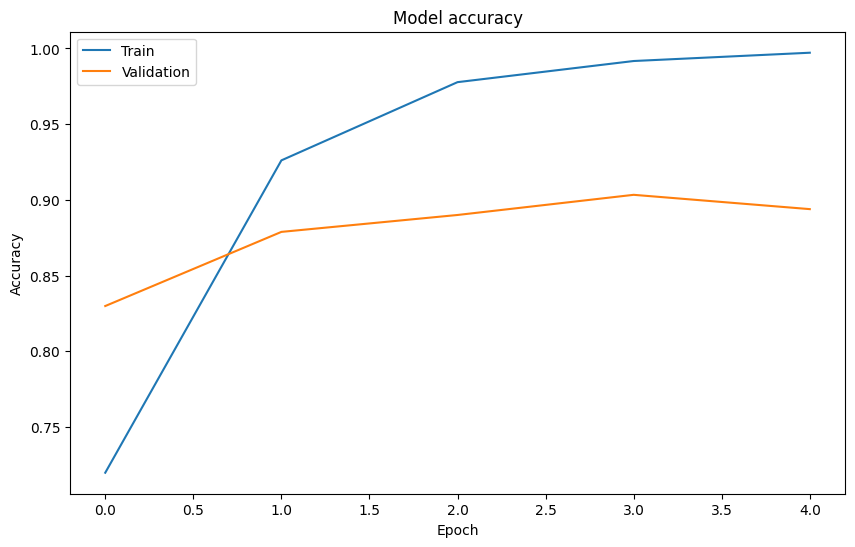

180/180 [==============================] - 3s 16ms/step


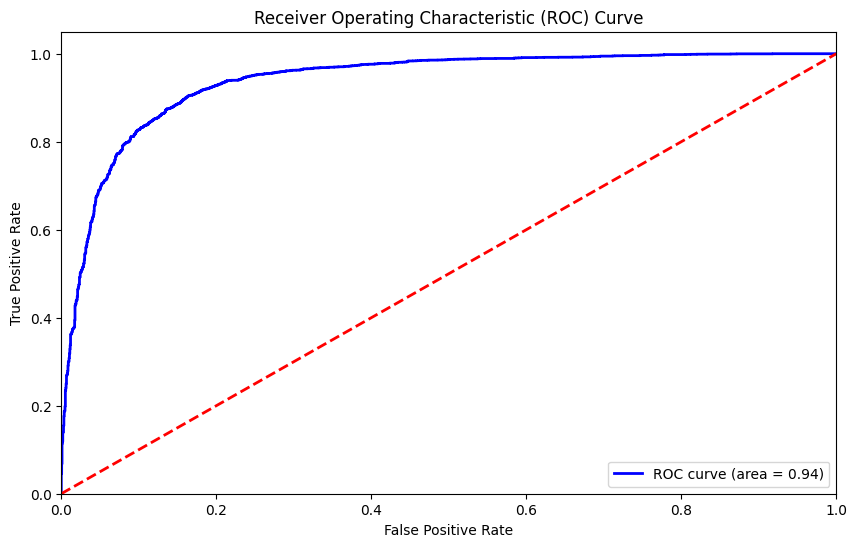

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot training & validation accuracy values
def plot_accuracy(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Plot training & validation loss values
def plot_loss(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Plot ROC curve
def plot_roc(model, X_test, Y_test):
    Y_pred_proba = model.predict(X_test).ravel()
    fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Plotting the accuracy, loss, and ROC curve
plot_accuracy(history)
plot_roc(model, X_test, Y_test)
